In [23]:
from warnings import filterwarnings
filterwarnings('ignore')
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2)) # if stride not given, it is equal to pool filter size
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [25]:
# Update the Adam optimizer parameters
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)

In [26]:
classifier.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Define the base directory
base_dir = 'dataset'

In [28]:
# Define full paths for training and test directories
train_dir = os.path.join(base_dir, 'train_set')
test_dir = os.path.join(base_dir, 'test_set')

In [29]:
# Check the contents of directories
def check_directory_contents(directory):
    print(f"Checking files in '{directory}':")
    for subdir, _, files in os.walk(directory):
        print(f" {subdir}: {len(files)} files")

In [30]:
# Check contents of directories
check_directory_contents(train_dir)
check_directory_contents(test_dir)

Checking files in 'dataset\train_set':
 dataset\train_set: 0 files
 dataset\train_set\happy: 248 files
 dataset\train_set\neutral: 241 files
Checking files in 'dataset\test_set':
 dataset\test_set: 0 files
 dataset\test_set\happy: 96 files
 dataset\test_set\neutral: 106 files


In [31]:
# Initialize ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
# Create data generators
train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(64, 64),
                                              batch_size=32,
                                              class_mode='binary')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary',
                                            shuffle=False)

Found 489 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [33]:
# Print some information about the data generators
print(f"Training set samples: {train_set.samples}")
print(f"Validation set samples: {test_set.samples}")
print(f"Training set class indices: {train_set.class_indices}")
print(f"Validation set class indices: {test_set.class_indices}")

Training set samples: 489
Validation set samples: 202
Training set class indices: {'happy': 0, 'neutral': 1}
Validation set class indices: {'happy': 0, 'neutral': 1}


In [34]:
# Update the optimizer configuration
adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
classifier.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [36]:
classifier.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
steps_per_epoch = train_set.samples // train_set.batch_size
validation_steps = test_set.samples // test_set.batch_size
classifier.fit(train_set,steps_per_epoch=steps_per_epoch,epochs=50,validation_data=test_set,validation_steps=validation_steps)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.4741 - loss: 0.8419 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 0.6977 - val_accuracy: 0.0000e+00 - val_loss: 0.7599
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.5520 - loss: 0.6896 - val_accuracy: 0.5417 - val_loss: 0.6892
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6562 - loss: 0.6884 - val_accuracy: 1.0000 - val_loss: 0.6560
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.4973 - loss: 0.6916 - val_accuracy: 0.5104 - val_loss: 0.6863
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.6941 - val_accuracy: 1.0000 - val_loss: 0.6375
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.5923 - loss: 0.6860 - val_accuracy: 0.6354 - val_loss: 0.6740
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.6697 - val_accuracy: 0.4000

In [38]:
# evaluate the model
scores = classifier.evaluate(test_set)
print(f"Accuracy: {round(scores[1]*100,2)}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8200 - loss: 0.4572
Accuracy: 81.19%


In [39]:
#Prediction of image
%matplotlib inline
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


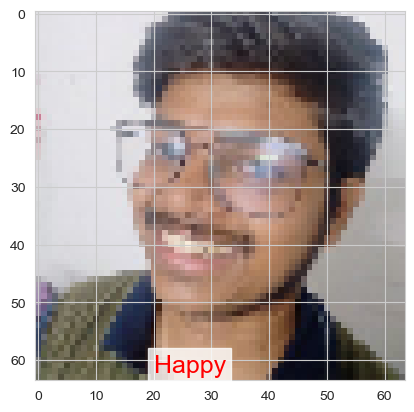

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


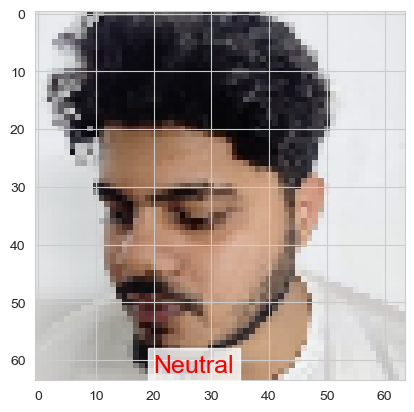

In [52]:
import cv2
images = [image.load_img('dataset\\test3.jpg', target_size=(64, 64)),
          image.load_img('dataset\\test4.jpg', target_size=(64, 64))]
for img1 in images:
    img = image.img_to_array(img1)
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = img/255
    # create a batch of size 1 [N,H,W,C]
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if prediction[:, :]>0.5:
        value ='Neutral'
        plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Happy'
        plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)
    plt.show()

In [41]:
# # serialize model to JSON
# model_json = classifier.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# classifier.save_weights("model.weights.h5")
# print("Saved model to disk")

In [42]:
import pandas as pd
ytesthat = classifier.predict(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)


6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/stepWARNING:tensorflow:5 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A1AF3372E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


,filename,predict,y,y_pred
0,happy\20240730_234218.jpg,0.06422,0,0
1,happy\20240730_234219.jpg,0.04238,0,0
2,happy\20240730_234220.jpg,0.04156,0,0
3,happy\20240730_234221.jpg,0.00970,0,0
4,happy\Ausaf (1).jpeg,0.29900,0,0
5,happy\Ausaf (10).jpeg,0.15268,0,0
6,happy\Ausaf (11).jpeg,0.17575,0,0
7,happy\Ausaf (12).jpeg,0.02839,0,0
8,happy\Ausaf (13).jpeg,0.05938,0,0
9,happy\Ausaf (14).jpeg,0.05379,0,0


Text(52.722222222222214, 0.5, 'true value')

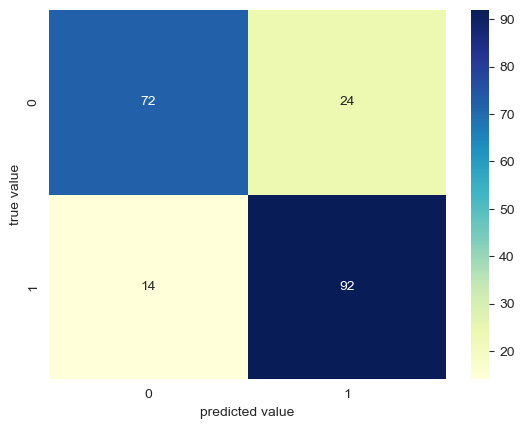

In [43]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g')
plt.xlabel('predicted value')
plt.ylabel('true value')